In [2]:
import pandas as pd

df = pd.read_csv('test1_formatrix.csv', encoding = 'cp1251', sep=';') 

In [5]:
df.head(10)

Org          Role              Name
0  Anvil    Основатель       Билли Руссо
1  Anvil         Глава       Билли Руссо
2  Anvil  Бывшие члены           Том Вид
3  Anvil  Бывшие члены       Майк Вашилл
4  Anvil  Бывшие члены  Спенсер Дженджер
5  Anvil  Бывшие члены        Джим Пратт
6  Anvil  Бывшие члены        Иссак Лэнг
7  Anvil  Бывшие члены      Льюис Уилсон
8  ГИДРА    Основатель              Улья
9  ГИДРА    Основатель      Иоганн Шмидт

In [6]:
a = list(df['Org'])
b = list(df['Role'])
new = []
for i in range(len(df)):
    new.append(a[i]+' '+b[i])
df['All_info'] = new
df.head(10)

Org          Role              Name            All_info
0  Anvil    Основатель       Билли Руссо    Anvil Основатель
1  Anvil         Глава       Билли Руссо         Anvil Глава
2  Anvil  Бывшие члены           Том Вид  Anvil Бывшие члены
3  Anvil  Бывшие члены       Майк Вашилл  Anvil Бывшие члены
4  Anvil  Бывшие члены  Спенсер Дженджер  Anvil Бывшие члены
5  Anvil  Бывшие члены        Джим Пратт  Anvil Бывшие члены
6  Anvil  Бывшие члены        Иссак Лэнг  Anvil Бывшие члены
7  Anvil  Бывшие члены      Льюис Уилсон  Anvil Бывшие члены
8  ГИДРА    Основатель              Улья    ГИДРА Основатель
9  ГИДРА    Основатель      Иоганн Шмидт    ГИДРА Основатель

In [7]:
roles = ['Основатель', 'Глава', 'Бывшие руководители', 'Члены', 'Бывшие члены']

In [8]:
orgs = list(df['Org'].unique())

In [9]:
import random

first = []
second = []

for o in orgs:
    i = []
    ii = []
    iii = []
    iv = []
    v = []
    for j in range(len(df)):
        if df['Org'][j] == o and df['Role'][j] == 'Основатель':
            i.append(df['Name'][j])
        if df['Org'][j] == o and df['Role'][j] == 'Глава':
            ii.append(df['Name'][j])
        if df['Org'][j] == o and df['Role'][j] == 'Бывшие руководители':
            iii.append(df['Name'][j])
        if df['Org'][j] == o and df['Role'][j] == 'Члены':
            iv.append(df['Name'][j])
        if df['Org'][j] == o and df['Role'][j] == 'Бывшие члены':
            v.append(df['Name'][j])
    if len(i) > 0:
        for j in range(len(i)):
            if len(ii) > 0:
                for t in range(len(ii)):
                    if i[j] != ii[t]:
                        first.append(i[j])
                        second.append(ii[t])
            if len(iii) > 0:
                for t in range(len(iii)):
                    if i[j] != iii[t]:
                        first.append(i[j])
                        second.append(iii[t])
    if len(ii) > 0:
        for j in range(len(ii)):
            if len(iv) > 0:
                for t in range(len(iv)):
                    if ii[j] != iv[t]:
                        first.append(ii[j])
                        second.append(iv[t])
    if len(iii) > 0:
        for j in range(len(iii)):
            if len(v) > 0:
                for t in range(len(v)):
                    if iii[j] != v[t]:
                        first.append(iii[j])
                        second.append(v[t])
    if len(iv) > 0:
        for j in range(len(iv)):
            if len(v) > 0:
                for t in range(len(v)):
                    i = random.randint(0, 11)
                    if i <= 5 and iv[j] != v[t]:
                        first.append(iv[j])
                        second.append(v[t])

In [10]:
d = {'first': first, 'second': second}
res = pd.DataFrame(data=d)

In [12]:
res.head(10)

first                 second
0  Улья           Иоганн Шмидт
1  Улья             Арним Зола
2  Улья         Александр Пирс
3  Улья  Вольфганг фон Штрукер
4  Улья        Дэниел Уайтхолл
5  Улья          Октавиан Блум
6  Улья                 Банкир
7  Улья                   Шейх
8  Улья              Баронесса
9  Улья             Грант Уорд

In [13]:
res = res.drop_duplicates()

In [14]:
res.to_csv('res.csv', index=False)

In [15]:
df1 = res

In [16]:
df1['first'].value_counts()

Александр Пирс    68
Говард Старк      50
Честер Филлипс    47
Иоганн Шмидт      46
Ник Фьюри         40
                  ..
Хэнк Пим           1
Таши               1
Талос              1
Оран               1
Джурмеин           1
Name: first, Length: 162, dtype: int64

In [17]:
df1['second'].value_counts()

Лист               30
Бобби Морс         30
Брок Рамлоу        28
Наташа Романофф    21
Клинт Бартон       20
                   ..
Пайпер              1
Хэппи Хоган         1
Палсус              1
Брон-Чар            1
Атт-Ласс            1
Name: second, Length: 268, dtype: int64

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(pd.concat([df1['first'], df1['second']]))

LabelEncoder()

In [19]:
df_first = le.transform(df1['first'])

In [20]:
df_second = le.transform(df1['second'])

In [21]:
m = max(max(df_first)+1, max(df_second)+1)
m

331

In [22]:
import numpy as np
a = np.zeros([m, m])
a.shape

(331, 331)

In [23]:
for i, j in zip(df_first, df_second):
    a[i][j] = 1
    a[j][i] = 1
for i in range(m):
    a[i][i] = 1

In [24]:
a

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [27]:
import networkx as nx
G=nx.Graph(a)

In [28]:
le.inverse_transform([1])

array(['Авраам Эрскин'], dtype=object)

In [29]:
le.inverse_transform([0])[0]

'Абу Бакар'

In [30]:
labels = []
for i in range(m):
    labels.append(df[df['Name'] == le.inverse_transform([i])[0]]['Role'].values[0])
lele = preprocessing.LabelEncoder()
labels_num = lele.fit_transform(labels)
labels = dict(zip([i for i in range(m)], labels_num+1))

In [31]:
lele.inverse_transform([0, 1, 2, 3, 4])

array(['Бывшие руководители', 'Бывшие члены', 'Глава', 'Основатель',
       'Члены'], dtype='<U19')

In [32]:
df['Role'].value_counts()

Бывшие члены           210
Члены                  177
Бывшие руководители     66
Глава                   50
Основатель              35
Name: Role, dtype: int64

In [33]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(20,12)) 
# nx.draw_networkx(G, labels=labels, node_color=labels_num+1)

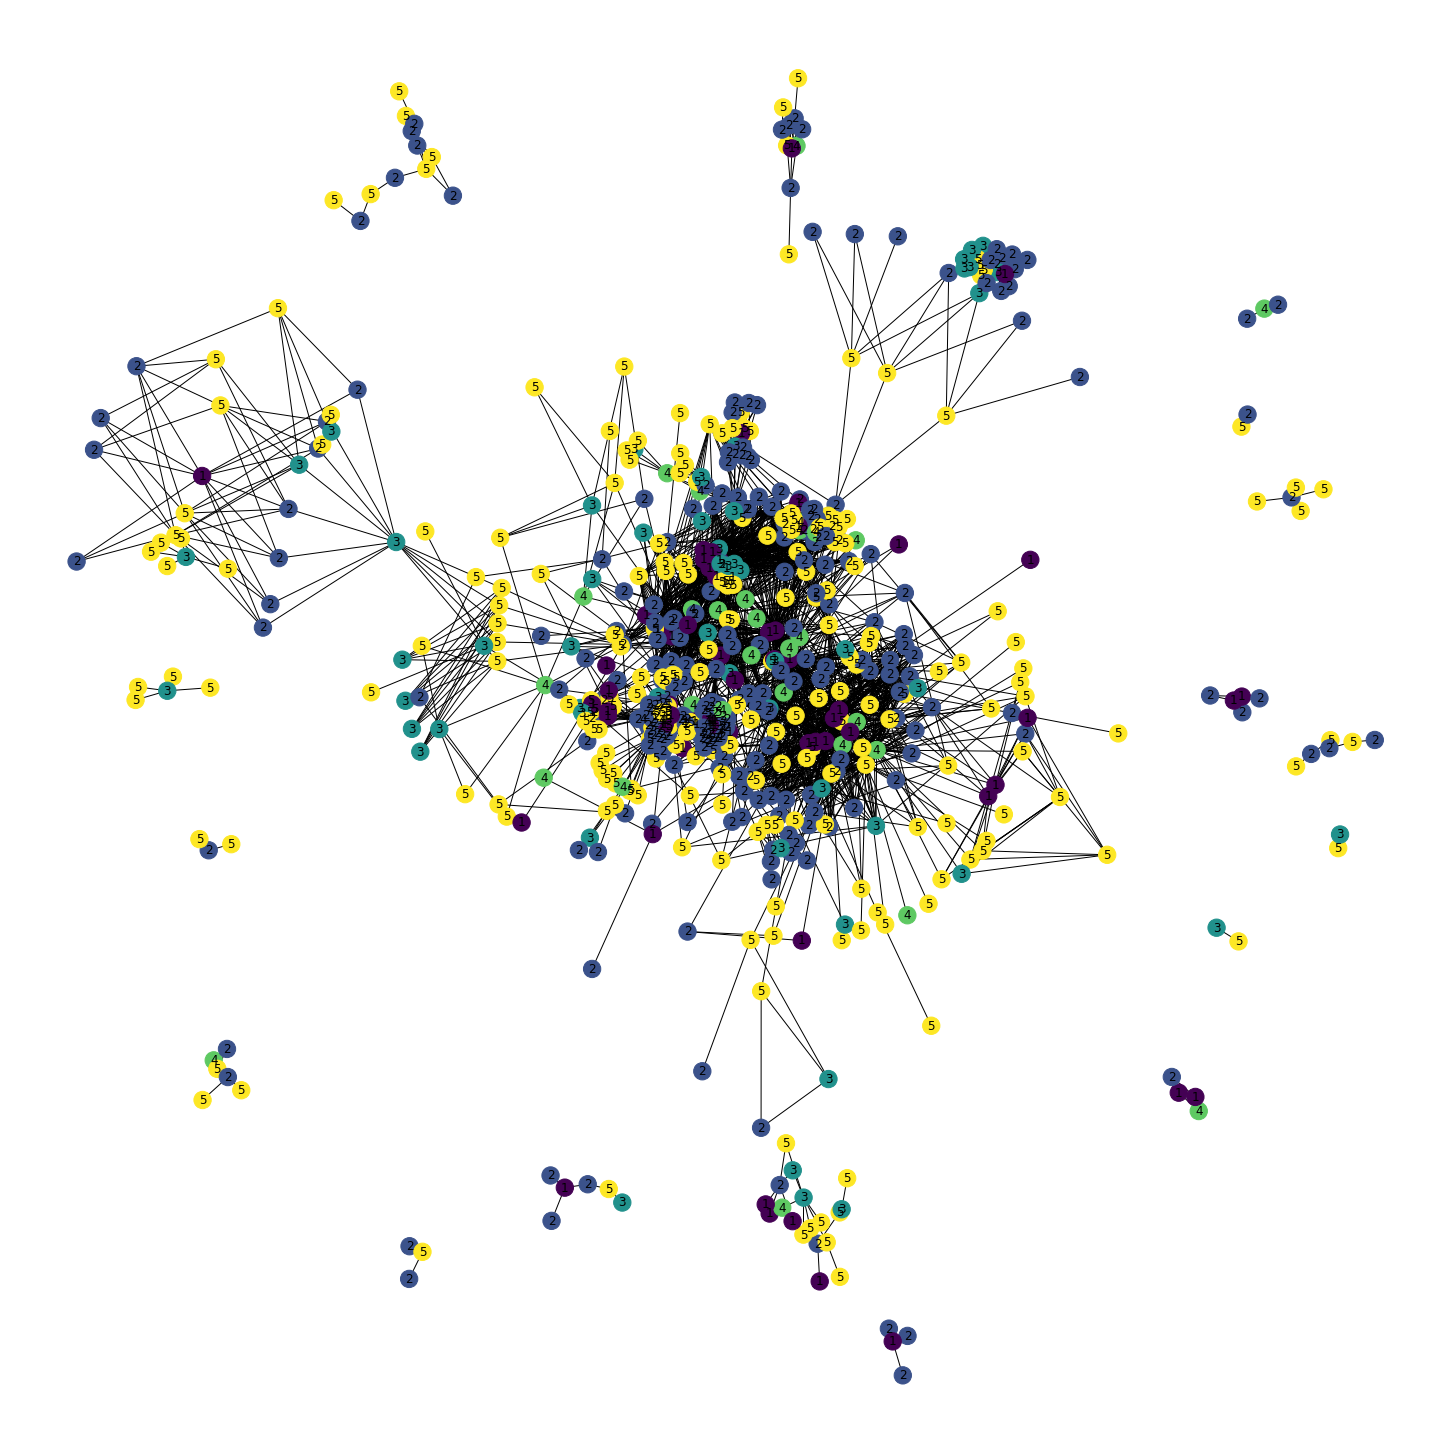

In [35]:
# разбиваем на кластеры по организациям

plt.figure(figsize=(20,20)) 
nx.draw_networkx(G, nx.draw_kamada_kawai(G, labels=labels, node_color=labels_num), labels=labels, node_color=labels_num)

In [29]:
labels_num

array([4, 4, 3, 1, 0, 1, 1, 0, 3, 1, 2, 1, 4, 2, 4, 1, 1, 1, 0, 4, 4, 4,
       3, 0, 0, 3, 4, 1, 4, 1, 4, 1, 1, 4, 1, 4, 4, 4, 3, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 4, 1, 4, 0, 4, 1, 0, 1, 4, 0, 4, 4, 0, 1, 1, 3, 0,
       0, 4, 4, 4, 1, 0, 0, 4, 1, 1, 3, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 1,
       0, 2, 4, 1, 4, 2, 1, 4, 1, 4, 4, 4, 4, 1, 4, 4, 0, 4, 1, 4, 0, 1,
       4, 4, 4, 1, 4, 1, 2, 1, 3, 2, 1, 4, 4, 2, 4, 4, 1, 0, 1, 4, 1, 0,
       0, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 3, 4, 4, 4, 1, 2, 4, 2, 4, 4,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 4, 3, 2, 1, 4, 1, 2, 1, 4, 4,
       4, 1, 4, 2, 4, 4, 0, 1, 1, 4, 4, 4, 4, 2, 3, 0, 1, 4, 4, 1, 1, 1,
       1, 4, 4, 4, 0, 1, 0, 1, 0, 4, 0, 4, 2, 1, 1, 1, 4, 1, 3, 2, 1, 1,
       1, 1, 1, 4, 4, 1, 1, 4, 4, 4, 1, 4, 1, 0, 4, 0, 4, 1, 1, 4, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 2, 4, 4, 4, 1, 1, 4, 4, 1, 4, 1,
       0, 2, 4, 4, 0, 2, 4, 4, 1, 0, 1, 1, 1, 1, 4, 4, 1, 1, 0, 3, 2, 1,
       2, 0, 4, 4, 1, 4, 3, 1, 1, 1, 1, 4, 1, 4, 4,

C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\

C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\

C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\

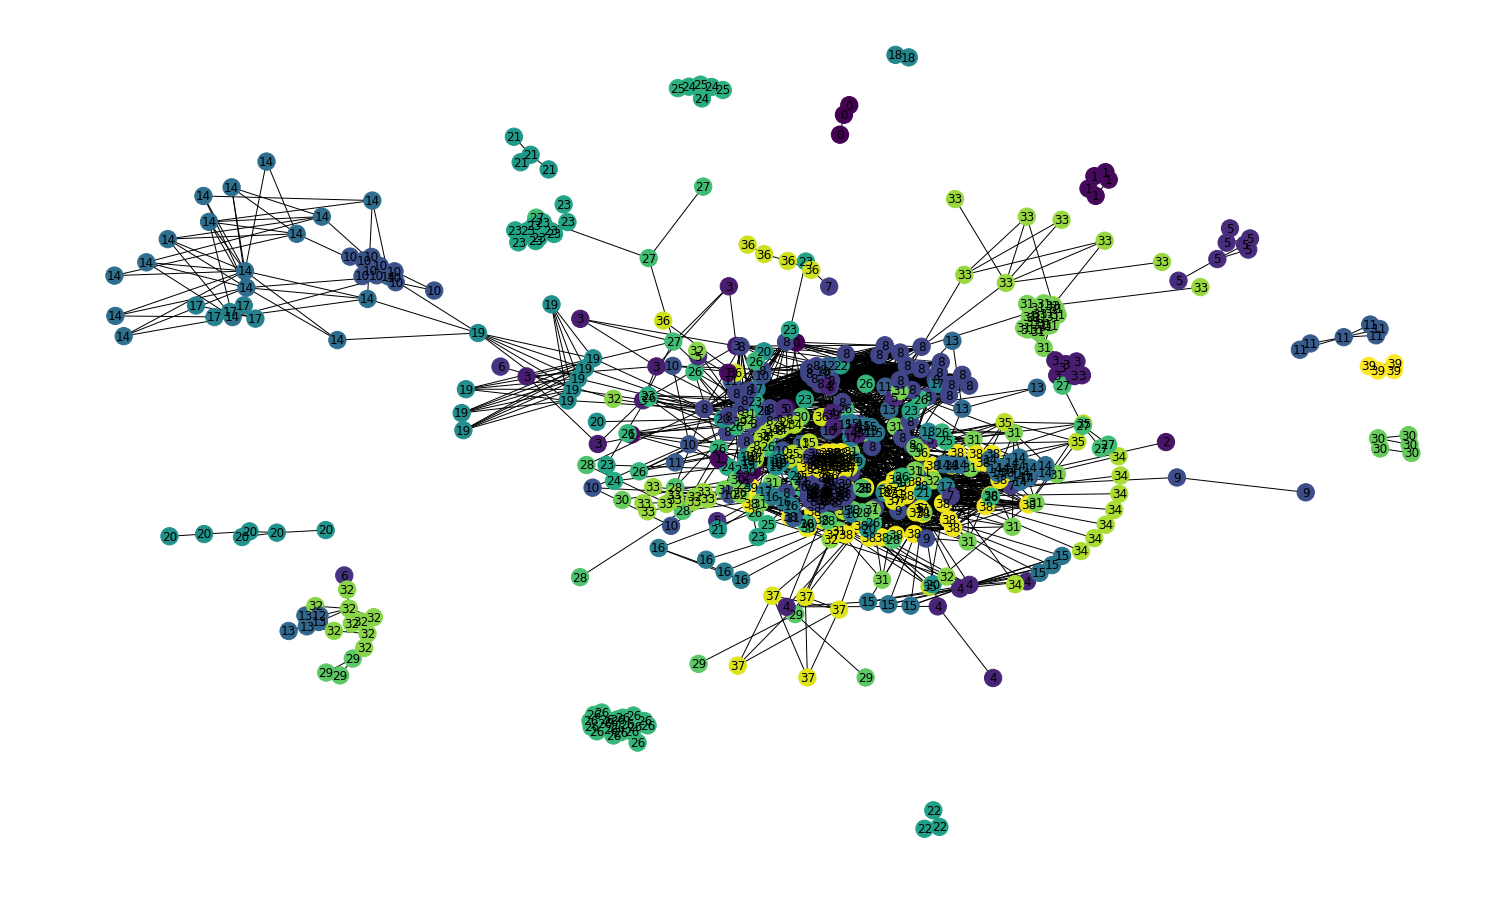

In [30]:
# разбиваем на кластеры по ролям

labels2 = []
for i in range(m):
    labels2.append(df[df['Name'] == le.inverse_transform([i])[0]]['Org'].values[0])
lele2 = preprocessing.LabelEncoder()
labels_num2 = lele.fit_transform(labels2)
labels2 = dict(zip([i for i in range(m)], labels_num2))
plt.figure(figsize=(20,12)) 
nx.draw_networkx(G, pos=nx.draw_kamada_kawai(G, labels=labels2, node_color=labels_num2), labels=labels2, node_color=labels_num2)

In [31]:
labels_num2

array([11, 34, 23,  8, 13, 31,  8,  8, 31, 31, 26, 33, 33, 38, 31,  4,  8,
       38,  8, 19, 14, 11, 31,  8,  8, 13, 31,  5,  7, 38,  9,  8, 26, 10,
        8, 14, 10,  4, 39, 38, 32,  8, 31,  8,  3,  8, 36, 14,  8, 15, 38,
       14,  8, 23, 26, 14, 31, 22,  8, 17, 35,  8,  8,  8, 38, 20,  8, 31,
       15, 27, 33,  2, 38, 38, 38,  8,  0,  0,  8, 34, 33, 17, 11,  8, 15,
        5,  3, 26, 38,  9, 36,  8,  3, 19,  8, 34, 38, 36, 38, 16, 37, 14,
       23, 15, 23, 38, 35, 34,  8, 23, 27, 31, 38, 27,  8,  8, 14,  1,  8,
       22,  8, 35, 14, 26, 19,  8,  8,  1, 23, 10, 14, 15, 38, 23,  8, 31,
        8, 26, 26, 38,  5, 31, 14, 10, 30, 31, 26, 19, 10, 26, 27, 19, 16,
        8, 14, 38,  1, 38,  8, 39, 20,  3, 38,  8, 28, 23, 32, 31, 19,  8,
       24, 21, 11, 38,  8, 26, 23, 14,  3, 26, 38, 30,  1, 24, 14, 10,  8,
        5, 31, 37, 28, 13, 13, 29,  6, 26,  0,  8, 38, 31, 10,  7, 31, 38,
        4, 26, 39, 29,  8, 11, 20, 33, 10, 10, 38, 20, 38,  4, 10, 33, 26,
       21,  8, 14, 10, 35

C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\

C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\

C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ibalaban-irmenina\AppData\Local\Continuum\anaconda3\

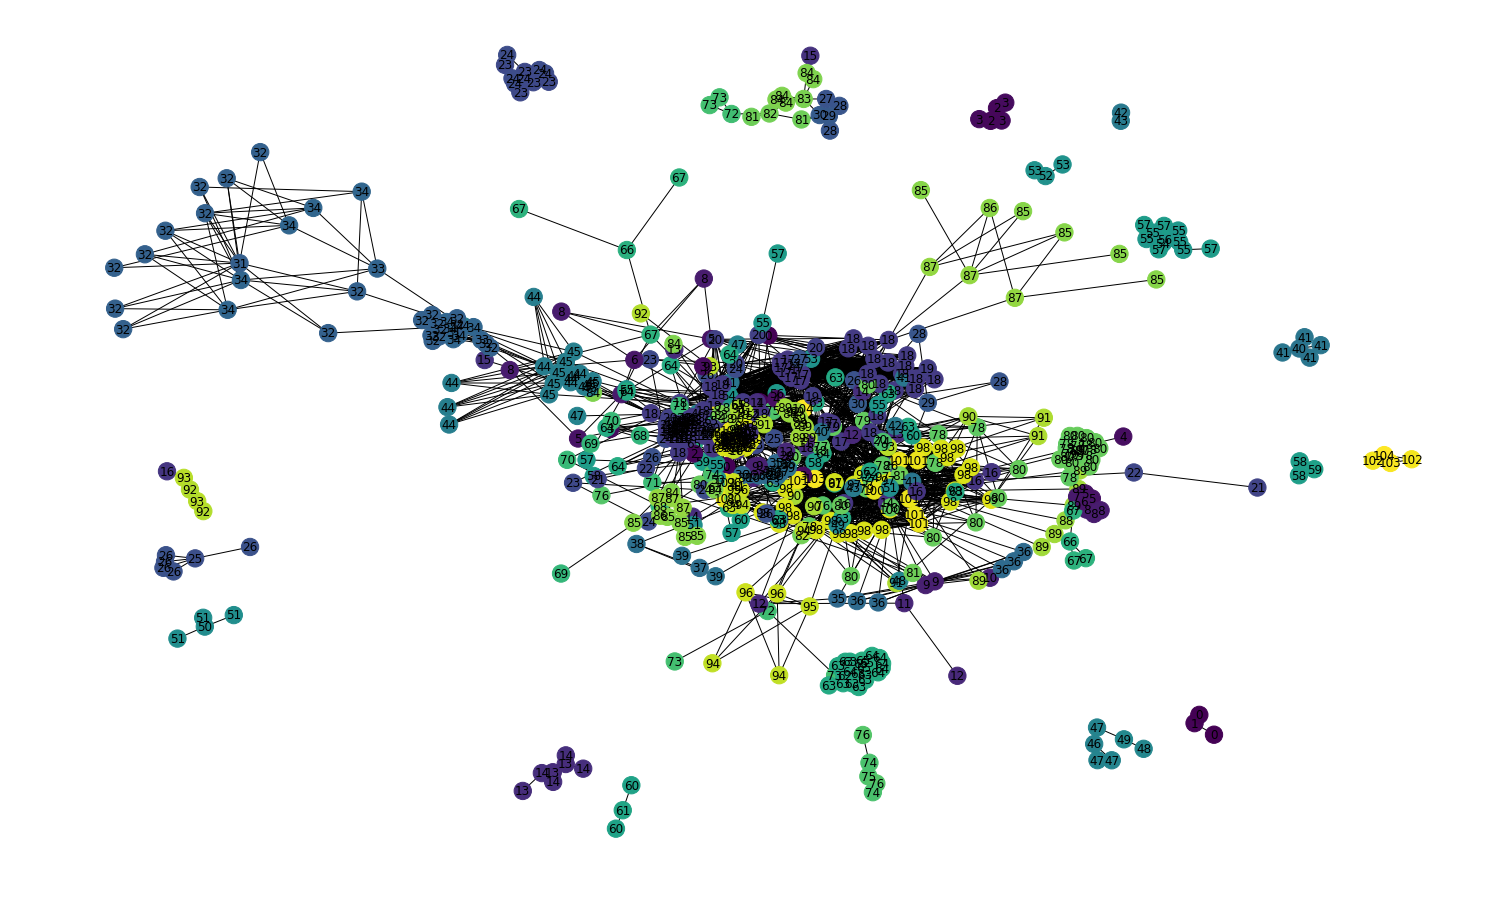

In [32]:
# объединяем по тому и другому вместе

labels3 = []
for i in range(m):
    labels3.append(df[df['Name'] == le.inverse_transform([i])[0]]['All_info'].values[0])
lele3 = preprocessing.LabelEncoder()
labels_num3 = lele.fit_transform(labels3)
labels3 = dict(zip([i for i in range(m)], labels_num3))
plt.figure(figsize=(20,12)) 
nx.draw_networkx(G, pos=nx.draw_kamada_kawai(G, labels=labels3, node_color=labels_num3), labels=labels3, node_color=labels_num3)

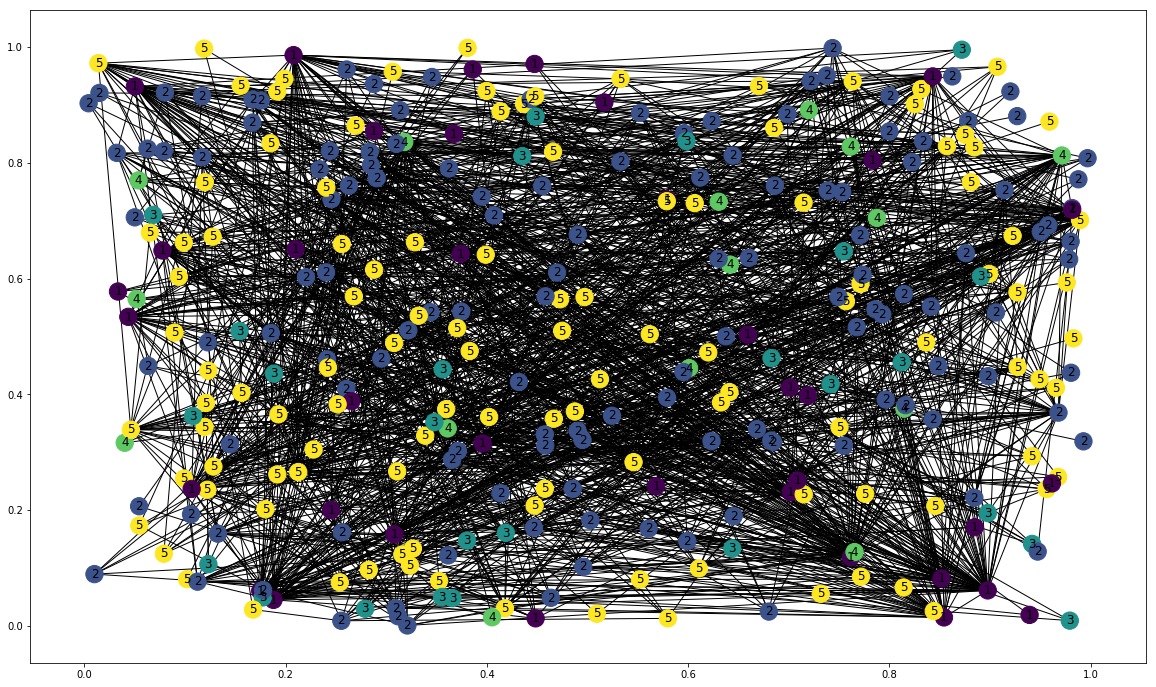

In [33]:
# рандомим координаты

D = {i:np.array([random.random(), random.random()]) for i in range(m)}
plt.figure(figsize=(20,12)) 
nx.draw_networkx(G, pos=D, labels=labels, node_color=labels_num)

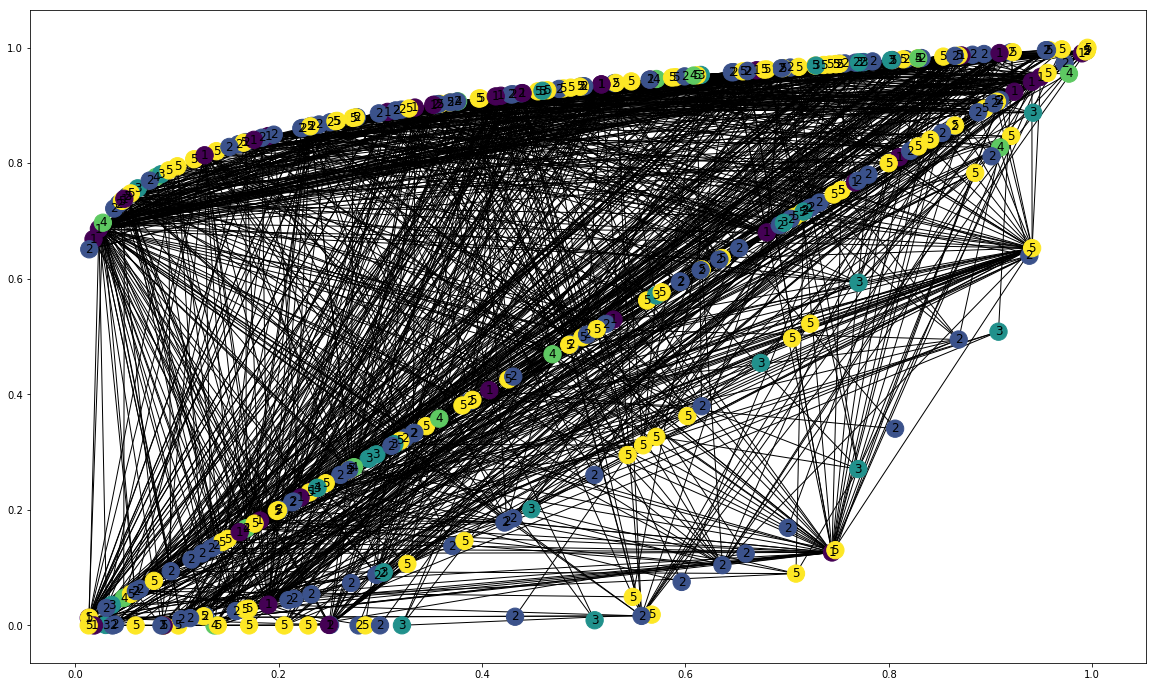

In [34]:
# берем действующих членов как линейную функцию, и по важности людей разносим их на разное растояние (вверх неважные, вниз важные)

D = dict()
for i in range(m):
    
    p = random.random()
    if df['Role'][i] == 'Глава':
        D[i] = np.array([p, p**7])
    elif df['Role'][i] == 'Основатель':
        D[i] = np.array([p, p**5])
    elif df['Role'][i] == 'Бывшие руководители':
        D[i] = np.array([p, p**2])
    elif df['Role'][i] == 'Члены':
        D[i] = np.array([p, p])
    elif df['Role'][i] == 'Бывшие члены':
        D[i] = np.array([p, p**0.1])
plt.figure(figsize=(20,12)) 
nx.draw_networkx(G, pos=D, labels=labels, node_color=labels_num)

In [35]:
# D = {i:np.array([random.random()**4, random.random()**4]) for i in range(m)}
# D = dict()
# for i, j in zip(range(m), labels_num):
#     p = random.random()
#     d = random.random()
#     if j == 0:
#         if d > 0.5:
#             D[i] = np.array([p, (1-p**2)**(0.5)])
#         else:
#             D[i] = np.array([p, -(1-p**2)**(0.5)])
#     elif j == 1:
#         if d > 0.5:
#             D[i] = np.array([p, d*(1-p**2)**(0.5)])
#         else:
#             D[i] = np.array([p, -d*(1-p**2)**(0.5)])
#     elif j == 2:
#         if d > 0.5:
#             D[i] = np.array([d*p, (1-p**2)**(0.5)])
#         else:
#             D[i] = np.array([d*p, -(1-p**2)**(0.5)])
#     elif j == 3:
#         if d > 0.5:
#             D[i] = np.array([d*p, d*(1-p**2)**(0.5)])
#         else:
#             D[i] = np.array([d*p, -d*(1-p**2)**(0.5)])
#     else:
#         if d > 0.5:
#             D[i] = np.array([1-p, 1-(1-p**2)**(0.5)])
#         else:
#             D[i] = np.array([1-p, 1-(1-p**2)**(0.5)])
# plt.figure(figsize=(20,12)) 
# nx.draw_networkx(G, pos=D, labels=labels, node_color=labels_num)

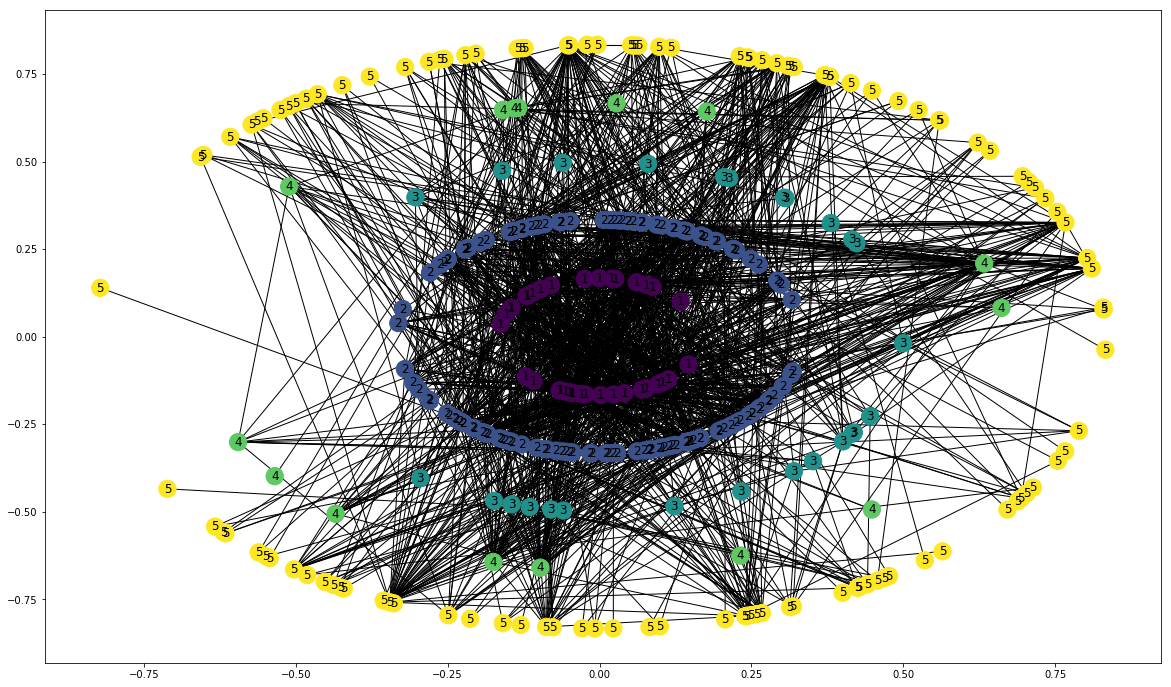

In [36]:
# разбиваем по кругам важности, чем ближе к центру, тем важнее для организации человек

D = {i:np.array([random.random()**4, random.random()**4]) for i in range(m)}
D = dict()
for i, j in zip(range(m), labels_num):
    p = random.random()
    p=(p-0.5)*2
    d = random.random()
    if d > 0.5:
        D[i] = (j+1)*np.array([p, (1-p**2)**(0.5)])/6
    else:
        D[i] = (j+1)*np.array([p, -(1-p**2)**(0.5)])/6

plt.figure(figsize=(20,12)) 
nx.draw_networkx(G, pos=D, labels=labels, node_color=labels_num)